In [41]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [42]:
img_sld = cv2.imread('img/P1020018.JPG')
img_blk = cv2.imread('img/P1020060.JPG')

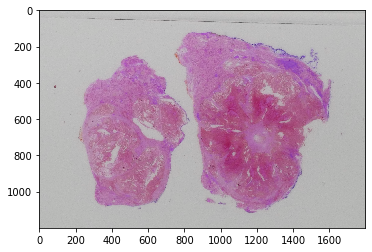

In [57]:
# Original image res = 3456 x 4608
# Final res 1200 x 1800
# Crop coordinate 980:2180, 1500:3100

height = img_sld.shape[0]
width = img_sld.shape[1]

cropped_height = 1200
cropped_width = 1800
y = 980
x = 1700

crop_img_sld = img_sld[y:y+cropped_height, x:x+cropped_width]
plt.imshow(crop_img_sld)
plt.show()

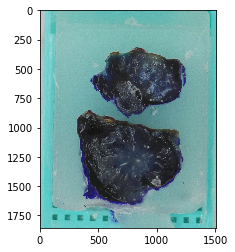

In [59]:
# Original image res = 3456 x 4608
# Final res 1200 x 1800
# Crop coordinate 980:2180, 1500:3100

height = img_blk.shape[0]
width = img_blk.shape[1]

cropped_height = 1800
cropped_width = 1200
y = 800
x = 1500

crop_img_blk = img_blk[800:(height-800), 1500:(width-1600)]
plt.imshow(crop_img_blk)
plt.show()

In [48]:
width


4608